In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:

# Load dataset from Excel file
data = pd.read_csv('/content/WineQT.csv')

print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values
print(data['quality'].value_counts())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

In [19]:
# Handle missing values (if any)
data.dropna(inplace=True)

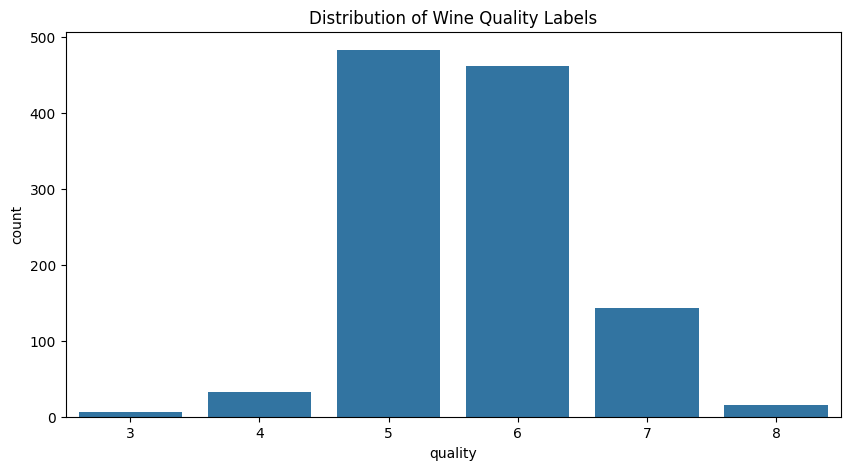

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['quality'])
plt.title("Distribution of Wine Quality Labels")
plt.show()

In [21]:
# Pairplot
sns.pairplot(data, hue='quality');
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [45]:
#  Feature Scaling
X = data.drop(columns=['quality'])
y = data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Splitting data into train, validation, and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [47]:

# Baseline models
# Step 6: Base Models
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

Logistic Regression Accuracy: 0.6419
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.82      0.75        97
           6       0.59      0.67      0.63        92
           7       0.62      0.17      0.27        29
           8       0.00      0.00      0.00         3

    accuracy                           0.64       229
   macro avg       0.32      0.28      0.28       229
weighted avg       0.61      0.64      0.61       229

--------------------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.5939
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.14      0.15         7
           5       0.67      0.72      0.69        97
           6       0.58      0.53      0.55        92
           7       0.53      0.55      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [50]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters :", grid_search.best_params_)


Best Parameters : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}


In [51]:
# Final Model Evaluation
y_final_pred = grid_search.best_estimator_.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, y_final_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_final_pred))

Final Model Accuracy: 0.7074235807860262
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 82 14  1  0]
 [ 0  0 24 65  3  0]
 [ 0  0  3 11 15  0]
 [ 0  0  0  3  0  0]]


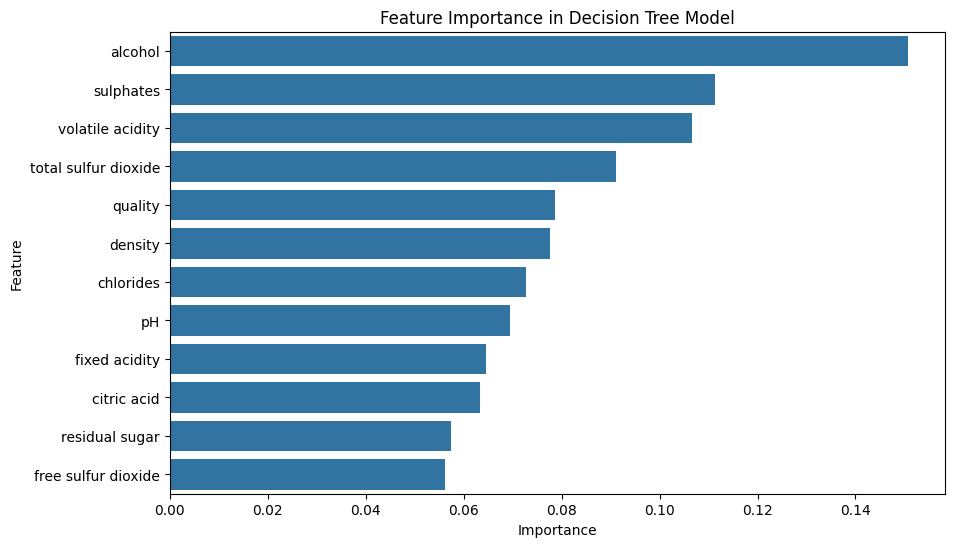

In [58]:
importances = grid_search.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.columns[:-1], 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in Decision Tree Model")
plt.show()